***Programming Problems of ESO208 Assignment 2***

In [ ]:
#import all relevant libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#      ADD MORE COMMENTS

Question 5 Bairstow's Method

In [ ]:
# we first define a function which can apply bairstow's method

def bairstows_method_function(n,a,ri,si,et,MAXIT):

  # n  : The degree of the polynomial
  # a  : List of length n+1 containing the coffecients where the ith entry is the coefficient of xⁱ
  # ri : Initial guess of r
  # si : Initial guess of s
  # et : Tolerance
  # MAXIT : Maximum number of iterations before the procedure is halted

  # return

  # iteration counter and loop variables for ri and si
  i = 0
  r = ri
  s = si

  # BASE CASE

  # if n==2, which means that the polynomila given is quadratic already and we don't need to guess r and s
  # so we simply return the r and s values as defined in the convention of the divisor polynomial
  if(n==2):
    return (a[2],-a[1]/a[2],-a[0]/a[2])

  # Divsion Iterations
  while(True):

    i+=1

  # intialise empty lists to store the coefficients of the quotient polynomial and the partial derivatives of b
    b = [None] * (n+1)
    b[n] = a[n]
    b[n-1] = a[n-1] + r * b[n]
    c = [None] * (n+1)
    c[n] = b[n]
    c[n-1] = b[n-1] + r * c[n]

  # division
    for i in range(n-2,-1,-1):
      b[i] = a[i] + r * b[i+1] + s * b[i+2]
      c[i] = b[i] + r * c[i+1] + s * c[i+2]

  # check determinant for solving the update values of r and s in the partial derivative equation
    er = 1
    es = 1
    det = c[2]**2 -c[3]*c[1]
    if(det!=0):
      dr = (b[0]*c[3]-b[1]*c[2])/det
      ds = (b[1]*c[1]-b[0]*c[2])/det

      r += dr
      s += ds
      if(r!=0):
        er = abs(dr/r)
      if(s!=0):
        es = abs(ds/s)

      # if det is zero, slightly perturb the r and s values and restart the iterations
    else:
      r+=0.1
      s+=0.1
      i=0

    # return b, the coefficients of the remainder and quotient polynomial, and the r and s values if itereations exceed MAXIT or  es and er <=et
    if(i>=MAXIT or (es <= et and er <= et)):
      return (b,r,s)

In [ ]:
# we now define a function to calculate the roots of a quadratic polynomial, given coefficients r and s from bairstow's method
def quad_root(r,s):
  x1r = None
  x1i = None
  x2r = None
  x2i = None
  delta = r**2 + 4*s

  # real roots
  if(delta>=0):
    delta = math.sqrt(delta)
  # based on the sign of r, we calculate the roots x1 and x2 such that subtractive calcellation is avoided
    if(r>=0):
      x1r = (r+delta)/2
      x2r = (-2*s)/(r+delta)
    else:
      x1r = (r-delta)/2
      x2r = (-2*s)/(r-delta)

    return 'real',x1r,0,x2r,0

  # complex roots
  else:
    delta = math.sqrt(-delta)
    return 'complex',r/2,delta/2,r/2,-delta/2

In [ ]:
# subpart i

f = [-2,6.2,-4,0.7]

# we note that f is cubic , so we need to call the bairstows_method_function() exactly once, and the remainder will be linear
# also we pre-define a tolerance and maximum number of iterations
Tolerance = 1e-12
MAX_IT = 50

b,r,s = bairstows_method_function(3,f,1,2,Tolerance,MAX_IT)

nature,x1r,x1i,x2r,x2i = quad_root(r,s)

# we can directly extract the third root from the quotient
x3 = -b[2]/b[3]

# print the roots found by bairstow's method
print(f"x1 is {x1r} + {x1i}i")
print(f"x2 is {x2r} + {x2i}i")
print(f"x3 is {x3}")

x1 is 2.0000000000000004 + 0i
x2 is 0.43573223270482864 + 0i
x3 is 3.278553481580885


In [ ]:
# subpart ii

f = [9.34,-21.97,16.3,-3.704]

b,r,s = bairstows_method_function(3,f,1,2,Tolerance,MAX_IT)

nature,x1r,x1i,x2r,x2i = quad_root(r,s)

# we cal directly extract the third root from the quotient
x3 = -b[2]/b[3]

# print the roots found by bairstow's method
print(f"x1 is {x1r} + {x1i}i")
print(f"x2 is {x2r} + {x2i}i")
print(f"x3 is {x3}")

x1 is 2.2946588757678184 + 0i
x2 is 1.1524858651989063 + 0i
x3 is 0.9535032071974221


In [ ]:
# subpart iii

f = [5,-2,6,-2,1]

# we note that the polynomial is quartic, so we need to apply bairstow's method exactly once
b,r,s = bairstows_method_function(4,f,1,2,Tolerance,MAX_IT)

nature1,x1r,x1i,x2r,x2i = quad_root(r,s)

# we extract the remaining two roots from the quadratic quotient directly
nature2,x3r,x3i,x4r,x4i = quad_root(-b[3]/b[4],-b[2]/b[4])

# print the roots found by bairstow's method
print(f"x1 is {x1r} + {x1i}i")
print(f"x2 is {x2r} + {x2i}i")
print(f"x3 is {x3r} + {x3i}i")
print(f"x4 is {x4r} + {x4i}i")


x1 is -1.3350224239891565e-18 + 1.0i
x2 is -1.3350224239891565e-18 + -1.0i
x3 is 1.0 + 2.0i
x4 is 1.0 + -2.0i


Question 6 Soil Consolidation Test

In [ ]:
# import the soil consolidation data csv file

df = pd.read_csv('/content/drive/MyDrive/asgn_2_assets/soil_consolidation_data.csv')

# print the dataframe
print(df)


    Time  Settlement
0      0           0
1      4           2
2      8           4
3     12           6
4     16           8
5     20          10
6     24          12
7     28          14
8     32          16
9     36          20
10    40          22


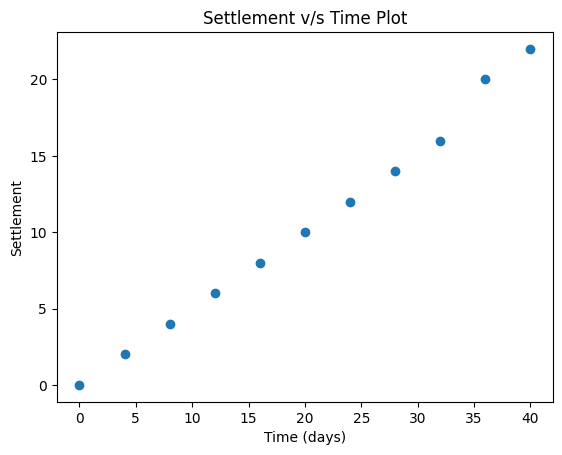

In [ ]:
# we plot the datapoints to get a rough idea of the degree of the lagrange polynomial that will best fit the data

x = np.array(df['Time'])
y = np.array(df['Settlement'])
plt.scatter(x,y)
plt.xlabel("Time (days)")
plt.ylabel("Settlement")
plt.title("Settlement v/s Time Plot")
plt.show()

In [ ]:
# subpart i

# estimation of the Settlement when, Time = 6 days and Time = 23 days using Langrange's Interpolation
# we define a, lagrange_interpol() function to calculate the interpolated Settlement values at the required Time

def lagrange_interpol(x,y,n,xx):
  ans = 0.0

  for i in range(n):
    product = y[i]
    for j in range(n):
      if(j!=i):
        product *= (xx-x[j])/(x[i]-x[j])

    ans += product

  return ans

In [ ]:
n = x.size

print(f"The value at x=6 from lagrange interpolation {lagrange_interpol(x,y,n,6)}")
print(f"The value at x=23 from lagrange interpolation {lagrange_interpol(x,y,n,23)}")



The value at x=6 from lagrange interpolation 2.966178894042968
The value at x=23 from lagrange interpolation 11.49437705427408


In [ ]:
# subpart ii

# we first define a function which can recursively give us the divided differences we need

def newtons_divided_difference(x,y,i,j):
  if(i-j==1):
    return (y[i]-y[j])/(x[i]-x[j])

  return (newtons_divided_difference(x,y,i,j+1) - newtons_divided_difference(x,y,i-1,j))/(x[i]-x[j])

# NOTE: ndd is shorthand for newton's divided difference

def ndd_interpolation_calculator(xx,x,y):
  n = x.size
  ans = y[0]
  for i in range(1,n):
    product = newtons_divided_difference(x,y,i,0)
    for j in range(i):
      product*=(xx-x[j])
    ans+=product
  return ans

print(f"The value at x=6 from Newton's Interpolation is {ndd_interpolation_calculator(6,x,y)}")
print(f"The value at x=23 from Newton's Interpolation is {ndd_interpolation_calculator(23,x,y)}")



The value at x=6 from Newton's Interpolation is 2.9661788940429688
The value at x=23 from Newton's Interpolation is 11.494377054274082


Clearly, the values obtained from Lagrange's and Newton's Interpolating Polynomiasl at x=6 and x=23 are the same.
This result is in agreement with the thoery that Newton's and Lagrange's Polynomials are the same, just with different representation

In [ ]:
# subpart iii

In general, for cases where the order of the polynomial is unknown, the Newton method has advantages because of the insight it provides into the behavior of the different-order formulas. In addition, the error estimate can usually be integrated easily into the Newton computation because the estimate employs a finite difference . Thus, for exploratory computations, Newton’s method is often preferable.

When only one interpolation is to be performed, the Lagrange and Newton formulations require comparable computational effort.
Because it does not require computation and storage of divided differences as opposed to Newton's Method, the Lagrange form is often used when the order of the polynomial is known a priori.

Since, we know a priori that settlement holds a linear relationship with time passed, in this case Langrange's Method is preferrable


In [ ]:
# subpart iv

# we create a function, cubic_spline, to get the values of the coefficeients of the interpolating polynomials of each interval
# these are n+1 points and we need to interpolate it in n intervals

# but the regular cubic interpolation requires us to solve about 4n equations, and if done by matrix multiplication,
# is a computationally heavy task

# instead, as suggested by Cheney abnd Kincaid in 2008, we first determine the second derivatives of the splines
# in each interval, which allows us to find the splines and only requires us to solve n-1 simulataneous equations,
# a major improvement over 4n equations in the standard approach

def SD_calculator(x,y):

  # number of intervals is 1 less than the number of points
  n = x.size - 1
  # initialize empty matrix Z and empty vector Y, to solve the system of linear equations , Y = ZD, where D is the vector
  # containing the second derivatives of the function at the knots
  Z = np.zeros((n+1,n+1))
  Y = np.zeros((n+1,1))

  # Generatethe Z matrix and the vector Y
  for i in range(1,n):
    Z[i,i-1] = x[i]-x[i-1]
    Z[i,i] = 2*(x[i+1]-x[i-1])
    Z[i,i+1] = x[i+1]-x[i]

    Y[i,0] = 6*(y[i+1]-y[i])/(x[i+1]-x[i]) + 6*(y[i-1]-y[i])/(x[i]-x[i-1])

  Y[0,0] = 0
  Y[n,0] = 0
  Z[0,0] = 1
  Z[n,n] = 1

  # as Y = ZD, we have, D = Z⁻¹Y
  DD = np.linalg.inv(Z) @ Y

  return DD

# this function generates the values of the spline in a given interval
def interval_y_generator(xl,xr,yl,yr,DDl,DDr):
  x = np.linspace(xl,xr,num=100,endpoint=True)

  return (DDl * ((xr-x)**3)/(6*(xr-xl))+
          DDr * ((x-xl)**3)/(6*(xr-xl))+
          (yl/(xr-xl) - DDl *(xr-xl)/6)*(xr-x)+
          (yr/(xr-xl) - DDr *(xr-xl)/6)*(x-xl))

# the complete cubic spline function, which when called
def cubic_spline(x,y,DD):
  n = x.size - 1

  for i in range(1,n+1):
    xl = x[i-1]
    xr = x[i]
    X = np.linspace(xl,xr,num=100,endpoint=True)
    Y = interval_y_generator(xl,xr,y[i-1],y[i],DD[i-1],DD[i])

    plt.plot(X,Y)


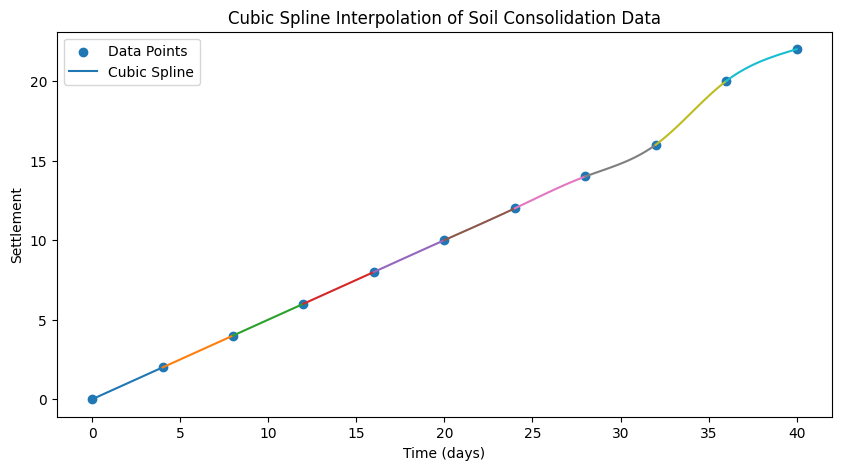

In [ ]:
# subpart iv (continued)

# plotting commands
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.scatter(x,y)
DD = SD_calculator(x,y)
cubic_spline(x,y,DD)
plt.title('Cubic Spline Interpolation of Soil Consolidation Data')
plt.xlabel("Time (days)")
plt.ylabel("Settlement")
plt.legend(['Data Points','Cubic Spline'])
plt.show()

Question 7 Stress Strain Data from Triaxial Test

In [ ]:
# subpart i

# import the stress strain data csv file
df = pd.read_csv('/content/drive/MyDrive/asgn_2_assets/stress_strain_data.csv')

# print df
print(df)

    Strain (%)  Stress(kPa)
0          0.0          0.0
1          0.3         24.0
2          0.7         58.8
3          1.0         84.6
4          1.4        108.1
5          1.7        122.8
6          2.1        133.1
7          2.4        136.9
8          2.8        140.7
9          3.1        142.3
10         3.4        141.8
11         3.8        141.3
12         4.1        140.9
13         4.5        141.0
14         4.8        141.3
15         5.2        141.7
16         5.5        141.7
17         5.9        142.0
18         6.2        142.4
19         6.6        142.7
20         7.0        143.1
21         7.2        143.4
22         7.6        143.8
23         8.0        144.1
24         8.3        144.1
25         8.8        144.5
26         9.0        144.8
27         9.4        145.2
28         9.8        145.5
29        10.0        145.9
30        10.3        146.2
31        10.7        146.6
32        11.0        146.9
33        11.7        147.3
34        12.0      

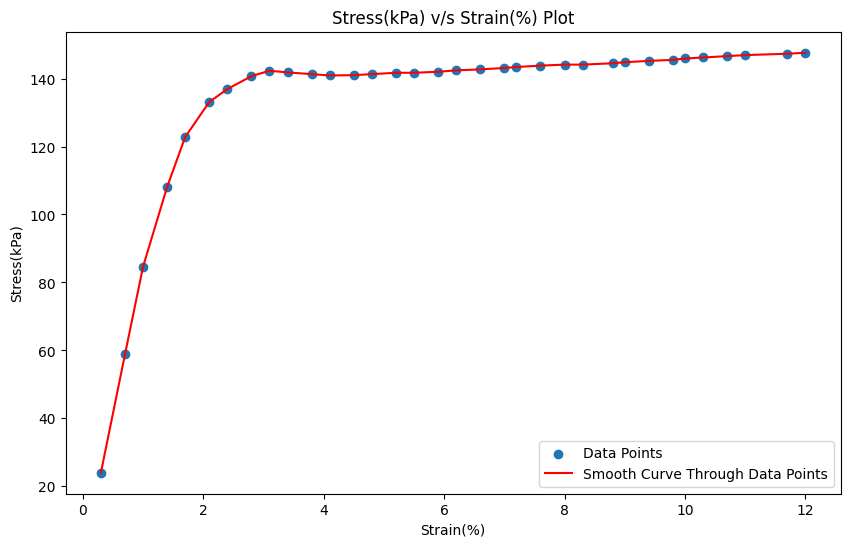

In [ ]:
# from the df it is evident that first row of entries is zero..
# so we drop this row during regression, to avoid NaN errors when we find the reciprocals of stress and strain in the following parts..
x = df['Strain (%)'].iloc[1:]
y = df['Stress(kPa)'].iloc[1:]

# plot the data to get an idea of the shape of the curve y v/s x

# plotting commands
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(6)
plt.scatter(x,y)
plt.plot(x,y,'-r')
plt.title("Stress(kPa) v/s Strain(%) Plot")
plt.xlabel("Strain(%)")
plt.ylabel("Stress(kPa)")
plt.legend(['Data Points','Smooth Curve Through Data Points'])
plt.show()

In [ ]:
# the model given in the question to fit the data is
# y = x/(a + b*x) for appropriate a and b,
# clearly the model is hyperbolic..

# we would like to apply regression techniques to get the values of the parameters a and b,
# but as the relationship between x and y is non-linear, we would have to first linearize it,

# on linearization, we get

# 1/y = a/x + b

# on applying linear regression on 1/y and 1/x, we can get the values of a and b

# define a function to calculate the multiplicative inverse of the argument provided
def inverse(x):
  if(x!=0):
     return 1/x
  else:
    return np.nan

# vectorize the inverse function to accept vector inputs
v_inv = np.vectorize(inverse)

# inverse of stress and strain
x_inv = pd.Series(v_inv(x))
y_inv = pd.Series(v_inv(y))

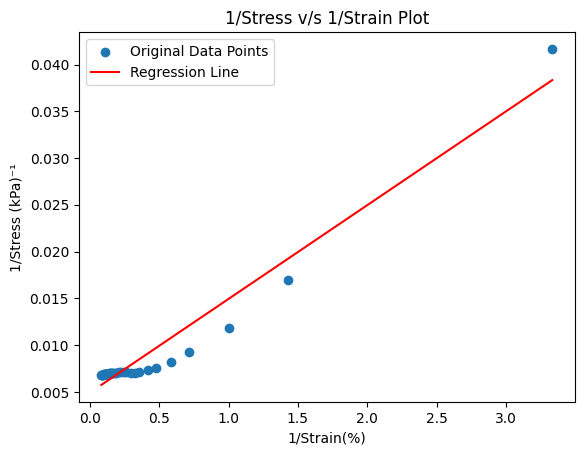

In [ ]:
# for least-squares linear regression, we know that the
# slope of line, m = (n*Σ(xi*yi) - (Σxi)*(Σyi))/(n*Σ(xi**2) - (Σxi)**2)
# y intercept, c = ȳ - m*x̄
# where x̄, ȳ and Σ have their regular meaning

# according to the hyperbolic provided in the question, a = m, b = c

# using the above values and facts
n = x_inv.size
a = (n*(x_inv.mul(y_inv).sum()) - (x_inv.sum())*(y_inv.sum()))/(n*(x_inv.mul(x_inv).sum()) - (x_inv.sum())**2)
b = y_inv.sum()/n - a*(x_inv.sum())/n

# plotting commands
plt.scatter(x_inv,y_inv)
plt.plot(x_inv,a*x_inv+b,'-r')
plt.legend(['Original Data Points','Regression Line'])
plt.xlabel('1/Strain(%)')
plt.ylabel('1/Stress (kPa)⁻¹')
plt.title('1/Stress v/s 1/Strain Plot')
plt.show()

In [ ]:
# subpart ii

# we now try to fit the data into a polynomial model, using matrices to solve for the polynomial coefficients

# as we do not know the order of the polynomial, we start we order 1 and keep on increasing the order until the value of coefficient of determination (r²)
# stablizes. We also employ RMS of residuals to check goodness of fit


# list to hold the r² values for the corresponding order polynomials, initialised with 0, so that the values allign nicely such that index = order
# and because we start with order 1, we assign index 0 to be 0 (base case)
# similarly. we initialize lists for coefficients, Z matrix, E (error) Vector, Sr (sum of square residuals)
r2_list = [0]
coefficients_list = [[0]]
Z_list = [[0]]
E_list = [[0]]
Sr_list = [0]

# convert the pandas Series object y, to numpy ndarray object Y
Y = np.array(y)

# calculate ȳ or Y_mean, and St, the Sum of Square of residuals between Y(data points) and ȳ : Required in calculation of r², coefficient of determination
Y_mean = np.mean(Y)
St = ((Y-Y_mean)*(Y-Y_mean)).sum()

# continue to increase the order of polynomial till coefficient of determination, r² stablizes
for order in range(1,11):
  Z = np.ones((n,order+1))
  for i in range(n):
    for j in range(1,order+1):
      Z[i,j] = (x.iloc[i])**j

  # matrix calculations, and updation of lists of Z ,coefficients, E, Sr, r²
  Z_list.append(Z)
  ZtZ = np.transpose(Z) @ Z
  ZtZ_inv = np.linalg.inv(ZtZ)
  A = ZtZ_inv @ np.transpose(Z) @ Y
  coefficients_list.append(A)
  E = Y - Z@A
  E_list.append(E)
  Sr = (E*E).sum()
  Sr_list.append(Sr)
  r2_list.append((St-Sr)/St)


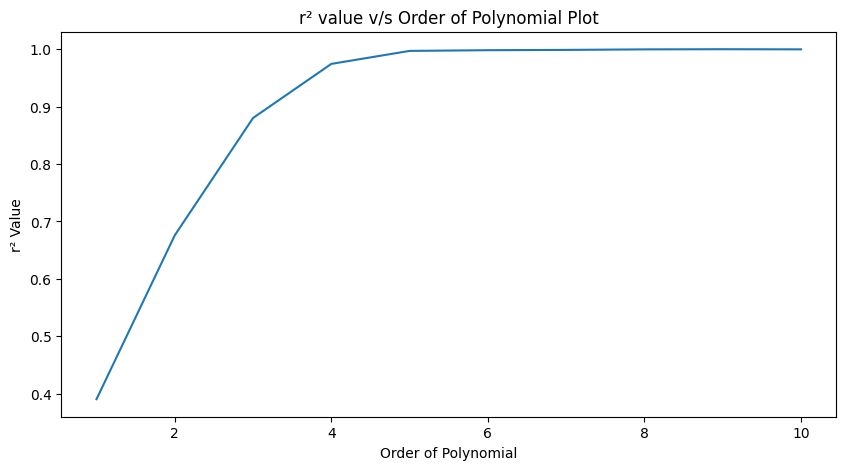



The r² value for Order 1 polynonmial is 0.3904245743204517
The r² value for Order 2 polynonmial is 0.6758607962112798
The r² value for Order 3 polynonmial is 0.8800626993203484
The r² value for Order 4 polynonmial is 0.9742488483294443
The r² value for Order 5 polynonmial is 0.9968330386770012
The r² value for Order 6 polynonmial is 0.9980557237398863
The r² value for Order 7 polynonmial is 0.9985801043049842
The r² value for Order 8 polynonmial is 0.9994757207863467
The r² value for Order 9 polynonmial is 0.999756526169983
The r² value for Order 10 polynonmial is 0.999513807302309


In [ ]:
# here we calculute the r² value of polynomials
# NOTE: When the data has noise, then r² value is a good metric to check the goodness of fit
#       But in this example, the data doesn't have much noise, so r² value is not an appropriate metric
#       Still it gives a general idea of the goodness of fit

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(range(1,11),r2_list[1:11])
plt.title("r² value v/s Order of Polynomial Plot")
plt.xlabel("Order of Polynomial")
plt.ylabel("r² Value")
plt.show()

print("\n")
for i in range(1,11):
  print(f"The r² value for Order {i} polynonmial is {r2_list[i]}")



We see that the r² value is >=0.99 for Order>=5 and >= 0.999 for Order>=8.

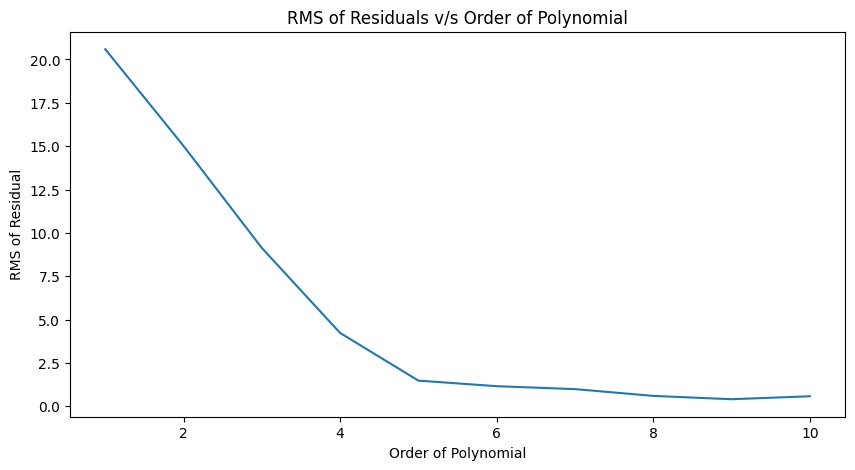



The RMS of residuals for Order 1 polynonmial is 20.586563647906132
The RMS of residuals for Order 2 polynonmial is 15.01190870268802
The RMS of residuals for Order 3 polynonmial is 9.13160819529293
The RMS of residuals for Order 4 polynonmial is 4.2312478214165345
The RMS of residuals for Order 5 polynonmial is 1.4838551685976311
The RMS of residuals for Order 6 polynonmial is 1.1626503340554515
The RMS of residuals for Order 7 polynonmial is 0.9935697377522414
The RMS of residuals for Order 8 polynonmial is 0.603742089826974
The RMS of residuals for Order 9 polynonmial is 0.4114303051377248
The RMS of residuals for Order 10 polynonmial is 0.5813990929509014


In [ ]:
# RMS residuals calculation where RMS stands for Root Mean Square
# When the data has less noise, RMS residuals are a good way to quantify the goodness of fit

rms_list = [0]

for i in range(1,11):
  rms_list.append(math.sqrt(Sr_list[i]/n))

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.plot(range(1,11),rms_list[1:11])
plt.title("RMS of Residuals v/s Order of Polynomial")
plt.ylabel("RMS of Residual")
plt.xlabel("Order of Polynomial")
plt.show()

print("\n")
for i in range(1,11):
  print(f"The RMS of residuals for Order {i} polynonmial is {rms_list[i]}")


We observe that RMS residual is least for Order 9 polynomial.
Along with r² values, we can safely state that Order 9 polynomial is a good fit.

[]

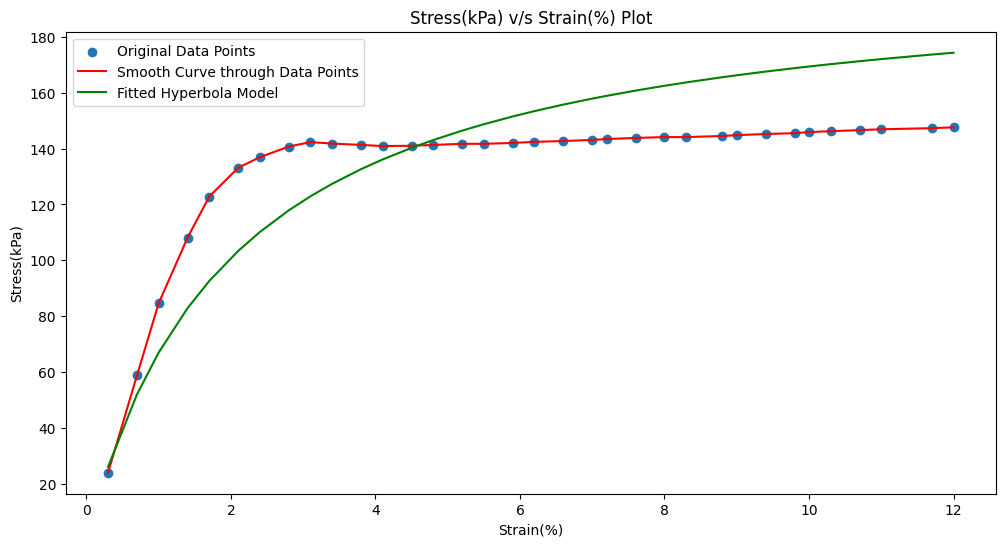

In [ ]:
# subpart iii

# we now plot the original data and the fitted hyperbola model
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

# plotting commands
plt.scatter(x,y)
plt.plot(x,y,'-r')
y_hyperbola_model = x/(a + b*x)
plt.plot(x,y_hyperbola_model,'-g')
plt.title("Stress(kPa) v/s Strain(%) Plot")
plt.xlabel("Strain(%)")
plt.ylabel("Stress(kPa)")
plt.legend(['Original Data Points','Smooth Curve through Data Points','Fitted Hyperbola Model'])
plt.plot()

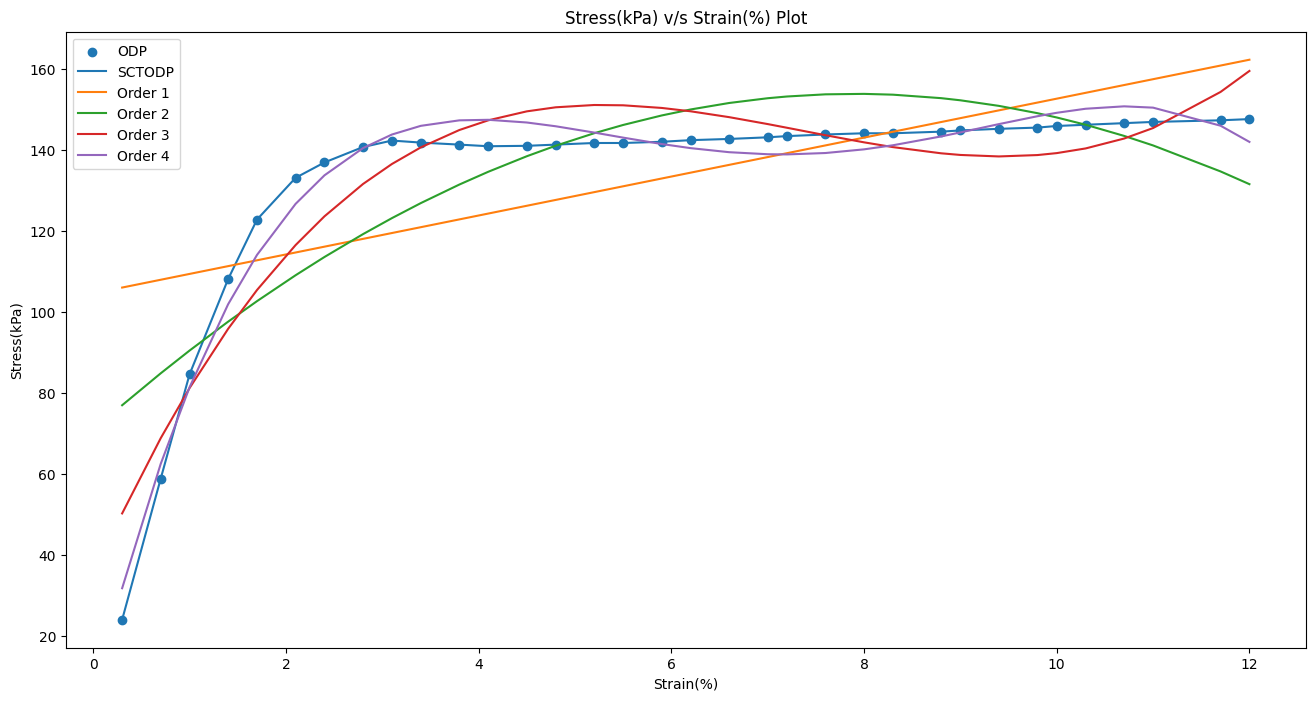

In [ ]:
# we now plot the original data and the higher order polynomials fitted by polynomial regression using matrices

## NOTE: ODP = Original Data Points,
##       SCTODP = Smooth Curve Through Original Data Points

# plotting commands
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)

plt.scatter(x,y)
plt.plot(x,y)
plt.plot(x,Z_list[1]@coefficients_list[1])
plt.plot(x,Z_list[2]@coefficients_list[2])
plt.plot(x,Z_list[3]@coefficients_list[3])
plt.plot(x,Z_list[4]@coefficients_list[4])

plt.title("Stress(kPa) v/s Strain(%) Plot")
plt.xlabel("Strain(%)")
plt.ylabel("Stress(kPa)")

plt.legend(['ODP','SCTODP','Order 1','Order 2','Order 3','Order 4'])
plt.show()


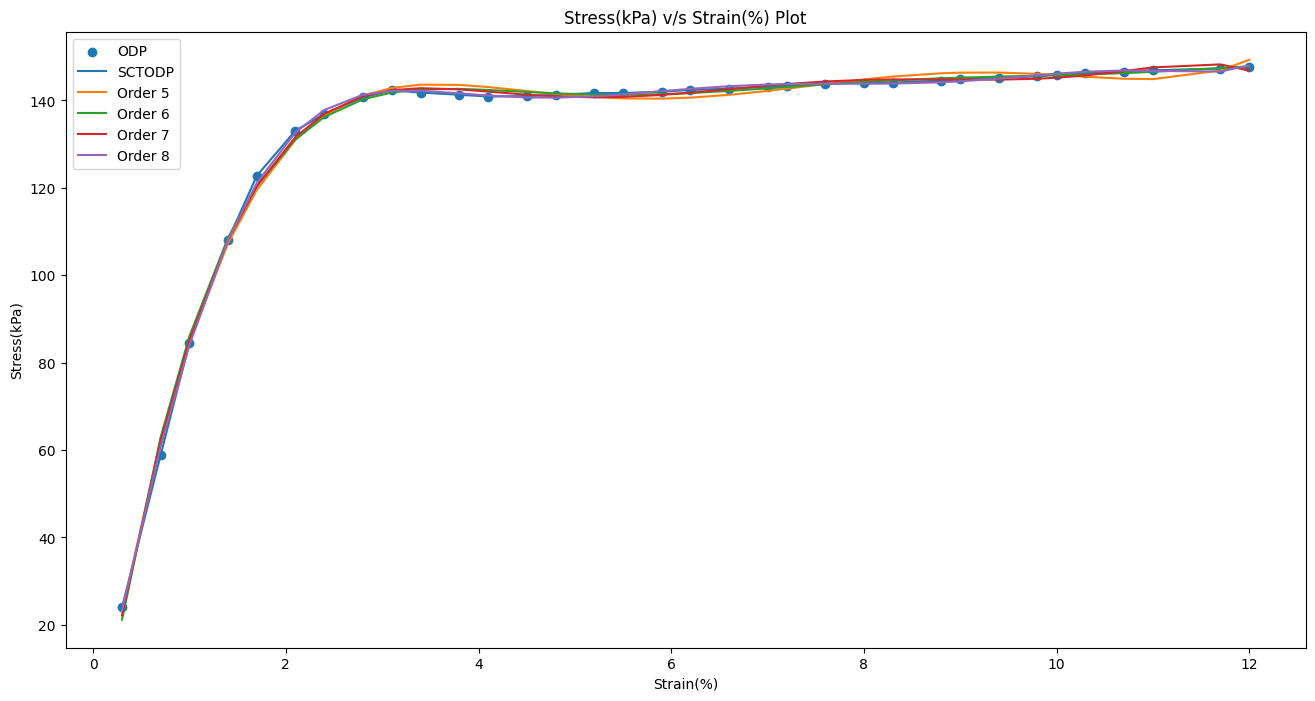

In [ ]:
# we now plot the original data and the higher order polynomials fitted by polynomial regression using matrices

## NOTE: ODP = Original Data Points,
##       SCTODP = Smooth Curve Through Original Data Points

# plotting commands
fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)

plt.scatter(x,y)
plt.plot(x,y)
plt.plot(x,Z_list[5]@coefficients_list[5])
plt.plot(x,Z_list[6]@coefficients_list[6])
plt.plot(x,Z_list[7]@coefficients_list[7])
plt.plot(x,Z_list[8]@coefficients_list[8])

plt.title("Stress(kPa) v/s Strain(%) Plot")
plt.xlabel("Strain(%)")
plt.ylabel("Stress(kPa)")

plt.legend(['ODP','SCTODP','Order 5','Order 6','Order 7','Order 8'])
plt.show()

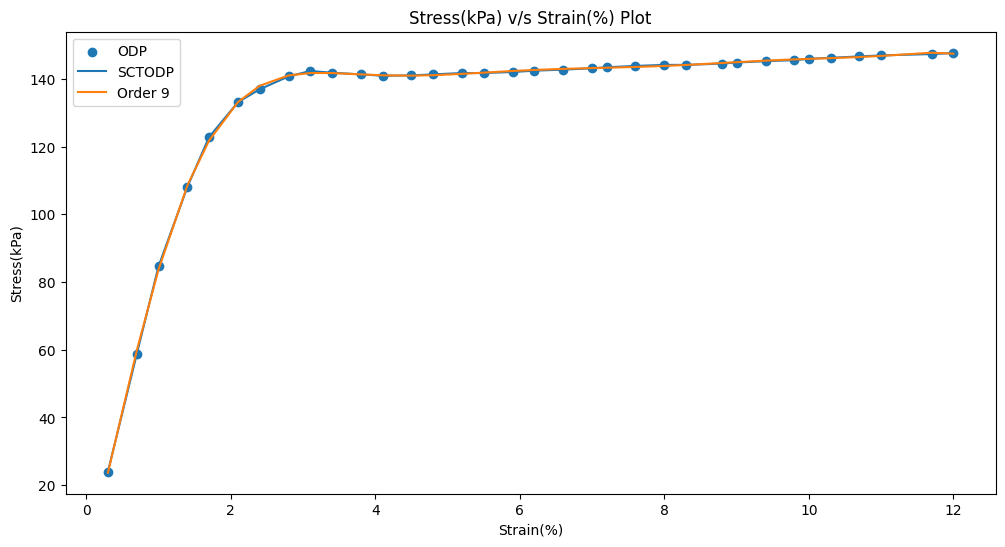

In [ ]:
# we now plot the order 9 polynomial, which is supposed to be the best fit, according to the r² and RMS residual metrics

# plotting commands
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.scatter(x,y)
plt.plot(x,y)

plt.plot(x,Z_list[9]@coefficients_list[9])
plt.title("Stress(kPa) v/s Strain(%) Plot")
plt.xlabel("Strain(%)")
plt.ylabel("Stress(kPa)")
plt.legend(['ODP','SCTODP','Order 9'])

plt.show()

In [ ]:

# subpart iv

# we now calculate the standard error of the estimate and the correlation coefficient for both the hyperbola model and the best fit of the polynomial model
# NOTE: As I already have calculated coefficient of determination for the polynomials above while deciding the goodness of fit,
#       I am using those values directly

# the standard error of estimate is sqrt(Sr/degrees of freedom) where the degrees of freedom is n - (number of parameters in the model)
# and the coefficient of correlation is the square root of the the coefficient of determination

# for hyperbola model,
def hyperbola_model(x):
  return x/(a+b*x)

def order9polynomial_model(x):
  ans = 0

  for i in range(10):
    ans += coefficients_list[9][i] * (x**i)

  return ans

def metrics_calculator(f,x,y,num_param):
  Sr = 0
  St = 0
  X = np.array(x)
  Y = np.array(y)
  mean = Y.mean()
  n = len(X)

  for i in range(n):
    Sr+=(Y[i] - f(X[i]))**2
    St+=(Y[i] - mean)**2

  r2 = (St-Sr)/St
  r = math.sqrt(r2)
  standard_error = math.sqrt(Sr/(n-num_param))

  return standard_error, r

hyperbola_se, hyperbola_r = metrics_calculator(hyperbola_model,x,y,2)
order9polynomial_se, order9polynomial_r = metrics_calculator(order9polynomial_model,x,y,10)

print(f"The values of Standard error of estimate and Coefficient of correlation respectively are:\n")
print(f"For Hyperbola Model: {hyperbola_se} and {hyperbola_r}\n")
print(f"For Order9Polynomial Model: {order9polynomial_se} and {order9polynomial_r}")



The values of Standard error of estimate and Coefficient of correlation respectively are:

For Hyperbola Model: 19.645039714917534 and 0.6910569916968532

For Order9Polynomial Model: 0.48970001291689885 and 0.9998782556741489


We observe that,

Standard error for polynomial model is very less compared to that of the hyperbola model,

and

r value for polynomial model is very close to 1 compared to the hyperbola model.

From the above metrics,we can conclude that the polynomial model is a better fit compared to the hyperbola model

In [ ]:



######################################


##########
####          TEST BLOCKS BELOW
##########


#######################################



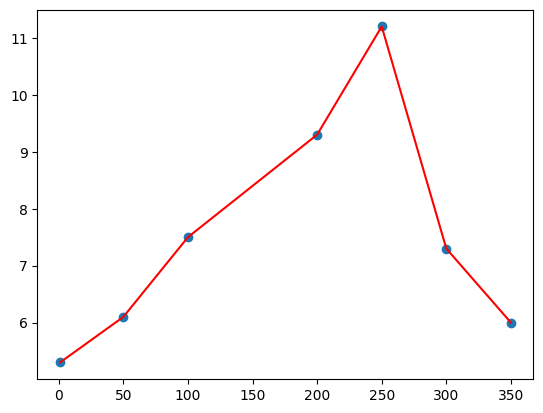

In [ ]:
# question 4 bonus
import matplotlib.pyplot as plt

x = [1,50,100,200,250,300,350]
y = [5.3,6.1,7.5,9.3,11.2,7.3,6]

plt.scatter(x,y)
plt.plot(x,y,'-r')
plt.show()

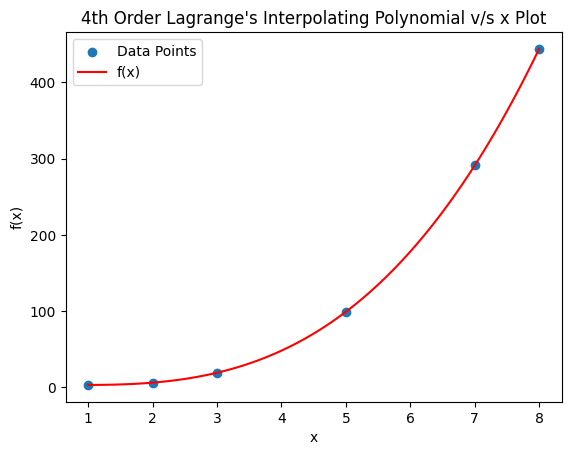

In [ ]:
# question 1 part ii

x = [1,2,3,5,7,8]
y = [3,6,19,99,291,444]
plt.scatter(x,y)

X = np.linspace(1,8,num=100,endpoint=True)
Y = X**3 - X**2 - X + 4
plt.plot(X,Y,'-r')

plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("4th Order Lagrange's Interpolating Polynomial v/s x Plot")
plt.legend(['Data Points',"f(x)"])
plt.show()

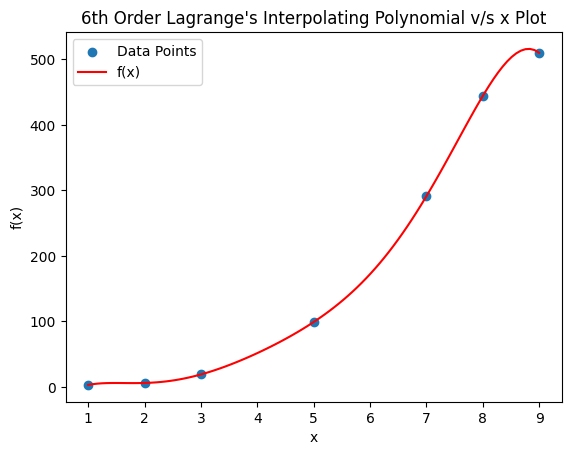

In [ ]:
# question 1 part ii
X = [1,2,3,5,7,8,9]
Y = [3,6,19,99,291,444,510]
plt.scatter(X,Y)
x = np.linspace(1,9,num=100,endpoint=True)
y = ((3/2688)*(x-2)*(x-3)*(x-5)*(x-7)*(x-8)*(x-9)+
     (-6/630)*(x-1)*(x-3)*(x-5)*(x-7)*(x-8)*(x-9)+
     (19/480)*(x-1)*(x-2)*(x-5)*(x-7)*(x-8)*(x-9)+
     (-99/576)*(x-1)*(x-2)*(x-3)*(x-7)*(x-8)*(x-9)+
     (291/480)*(x-1)*(x-2)*(x-3)*(x-5)*(x-8)*(x-9)+
     (-444/630)*(x-1)*(x-2)*(x-3)*(x-5)*(x-7)*(x-9)+
     (510/2688)*(x-1)*(x-2)*(x-3)*(x-5)*(x-7)*(x-8))
plt.plot(x,y,'-r')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.title("6th Order Lagrange's Interpolating Polynomial v/s x Plot")
plt.legend(['Data Points',"f(x)"])
plt.show()

In [ ]:
# question 1 part iii

Z = np.zeros((20,20))

# interior values conditions
Z[0,0]=8
Z[0,1]=4
Z[0,2]=2
Z[0,3]=1
Z[1,4]=8
Z[1,5]=4
Z[1,6]=2
Z[1,7]=1
Z[2,4]=27
Z[2,5]=9
Z[2,6]=3
Z[2,7]=1
Z[3,8]=27
Z[3,9]=9
Z[3,10]=3
Z[3,11]=1
Z[4,8]=125
Z[4,9]=25
Z[4,10]=5
Z[4,11]=1
Z[5,12]=125
Z[5,13]=25
Z[5,14]=5
Z[5,15]=1
Z[6,12]=343
Z[6,13]=49
Z[6,14]=7
Z[6,15]=1
Z[7,16]=343
Z[7,17]=49
Z[7,18]=7
Z[7,19]=1

# exterior values conditions
Z[8,0]=1
Z[8,1]=1
Z[8,2]=1
Z[8,3]=1
Z[9,16]=512
Z[9,17]=64
Z[9,18]=8
Z[9,19]=1

# first derivative conditions
Z[10,0]=12
Z[10,1]=4
Z[10,2]=1
Z[10,4]=-12
Z[10,5]=-4
Z[10,6]=-1
Z[11,4]=27
Z[11,5]=6
Z[11,6]=1
Z[11,8]=-27
Z[11,9]=-6
Z[11,10]=-1
Z[12,8]=75
Z[12,9]=10
Z[12,10]=1
Z[12,12]=-75
Z[12,13]=-10
Z[12,14]=-1
Z[13,12]=147
Z[13,13]=14
Z[13,14]=1
Z[13,16]=-147
Z[13,17]=-14
Z[13,18]=-1

# second derivative condtions
Z[14,0]=6
Z[14,1]=1
Z[14,4]=-6
Z[14,5]=-1
Z[15,4]=9
Z[15,5]=1
Z[15,8]=-9
Z[15,9]=-1
Z[16,8]=15
Z[16,9]=1
Z[16,12]=-15
Z[16,13]=-1
Z[17,12]=21
Z[17,13]=1
Z[17,16]=-21
Z[17,17]=-1

# extra conditions
Z[18,0]=1
Z[19,16]=1

In [ ]:
Y = np.zeros((20,1))

Y[0,0]=6
Y[1,0]=6
Y[2,0]=19
Y[3,0]=19
Y[4,0]=99
Y[5,0]=99
Y[6,0]=291
Y[7,0]=291
Y[8,0]=3
Y[9,0]=444



In [ ]:
A = np.linalg.inv(Z)@Y

In [ ]:
A ## question 1 part iii cubic spline coefficients

array([[ 1.91230134e-14],
       [ 4.36842105e+00],
       [-1.01052632e+01],
       [ 8.73684211e+00],
       [ 1.26315789e+00],
       [-3.21052632e+00],
       [ 5.05263158e+00],
       [-1.36842105e+00],
       [ 9.47368421e-01],
       [-3.68421053e-01],
       [-3.47368421e+00],
       [ 7.15789474e+00],
       [ 1.10526316e+00],
       [-2.73684211e+00],
       [ 8.36842105e+00],
       [-1.25789474e+01],
       [-1.18904452e-14],
       [ 2.04736842e+01],
       [-1.54105263e+02],
       [ 3.66526316e+02]])

In [ ]:
## question 2 part ii coefficients


Z = np.array([[611875,28125,1375],[28125,1375,75],[1375,75,5]])
Y = np.zeros((3,1))
Y[0,0] = 40300
Y[1,0] = 2030
Y[2,0] = 116
print(np.linalg.inv(Z) @ Y)


[[-0.03428571]
 [ 2.18857143]
 [-0.2       ]]
